<a href="https://colab.research.google.com/github/adarshanand2327/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

0it [00:00, ?it/s]

26427392it [00:02, 10984337.05it/s]                             


Extracting fashion_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 71166.10it/s]                            
0it [00:00, ?it/s]

Extracting fashion_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 2954772.22it/s]                            
0it [00:00, ?it/s]

Extracting fashion_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 27153.05it/s]            


Extracting fashion_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
tensor(2)


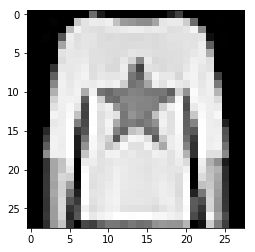

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])
trainset = datasets.FashionMNIST("fashion_MNIST", train = True, transform=transform, download = True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

testset = datasets.FashionMNIST("fashion_MNIST", train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle = True)

dataIter = iter(trainloader)
images, labels = dataIter.next()
plt.imshow(images[0].numpy().squeeze(), cmap = 'Greys_r')
print(labels[0])

In [0]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
class classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784, 256)
    self.hidden2 = nn.Linear(256, 128)
    self.hidden3 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
    self.dropout = nn.Dropout(p=0.2)
  def forward(self, x):
   
    x = self.dropout(F.relu(self.hidden1(x)))
    x = self.dropout(F.relu(self.hidden2(x)))
    x = self.dropout(F.relu(self.hidden3(x)))
    x = F.log_softmax(self.output(x), dim=1)
    
    return x

In [0]:
model = classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
model

classifier(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

In [10]:
epochs = 20
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    prediction = model(images)
    optimizer.zero_grad()
    loss = criterion(prediction, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  print(f"Training loss:  {running_loss/len(trainloader)}")
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
      images = images.view(images.shape[0], -1)
      outputs = model(images)
      _, pred = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    print('Accuracy:', correct/total)

Training loss:  0.3823780888624029
Accuracy: 0.8462
Training loss:  0.3714196678481376
Accuracy: 0.853
Training loss:  0.3759099246660021
Accuracy: 0.8449
Training loss:  0.3717298862029876
Accuracy: 0.8531
Training loss:  0.36636556169466933
Accuracy: 0.8572
Training loss:  0.3653189460796588
Accuracy: 0.8539
Training loss:  0.362721811003014
Accuracy: 0.8505
Training loss:  0.3591333365262444
Accuracy: 0.8483
Training loss:  0.3588864745806529
Accuracy: 0.8544
Training loss:  0.36392952365947684
Accuracy: 0.8501
Training loss:  0.35377908075478537
Accuracy: 0.8596
Training loss:  0.35124162455865826
Accuracy: 0.8497
Training loss:  0.3471319661783511
Accuracy: 0.8565
Training loss:  0.34137591429706066
Accuracy: 0.8527
Training loss:  0.35189166124949833
Accuracy: 0.8503
Training loss:  0.3417071346948142
Accuracy: 0.8623
Training loss:  0.34444358412708553
Accuracy: 0.8543
Training loss:  0.3451081605306439
Accuracy: 0.8553
Training loss:  0.3494975119988039
Accuracy: 0.8436
Trainin

In [0]:
checkpoint = {'input_size': 784,
              'output_size': 10,
            'hidden_layers': [each.out_features for each in model.hidden_layers],
            'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')            